1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



max speeds: 
 [28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76] 

21 

cumulative probability:
 [0.04545455 0.09090909 0.13636364 0.18181819 0.22727273 0.27272728
 0.3181818  0.36363637 0.4090909  0.45454547 0.5        0.54545456
 0.59090906 0.6363636  0.6818182  0.72727275 0.77272725 0.8181818
 0.8636364  0.90909094 0.95454544] 

max speed sorted:
 [22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97] 



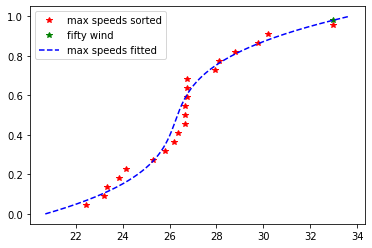

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
print('max speeds: \n', max_speeds, '\n')
print(years_nb, '\n')

N = 21
p_i=(np.arange(years_nb, dtype=np.float32)+1)/(N+1)
print('cumulative probability:\n', p_i, '\n')
sort_max_speeds = np.sort(max_speeds)
print('max speed sorted:\n', sort_max_speeds, '\n')
quantile_func=UnivariateSpline(p_i,sort_max_speeds)
fifty_prob = 1. - 0.02


fifty_wind = quantile_func(fifty_prob)
plt.plot(sort_max_speeds,p_i, 'r*',label='max speeds sorted')
plt.plot(fifty_wind, fifty_prob, 'g*',label='fifty wind')
nprob = np.linspace(0, 1, 1000)
max_speeds_fitted = quantile_func(nprob)
plt.plot(max_speeds_fitted, nprob , 'b--',label='max speeds fitted')
plt.legend()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [25]:
from scipy.interpolate import interp1d

month = pd.date_range('1/January/2000',periods=12, freq='M')
higher = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
lower =  np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
df = pd.DataFrame({'month':month,'higher':higher, 'lower':lower})
df

,month,higher,lower
0,1,17,-62
1,2,19,-59
2,3,21,-56
3,4,28,-46
4,5,33,-32
5,6,38,-18
6,7,37,-9
7,8,37,-13
8,9,31,-25
9,10,23,-46


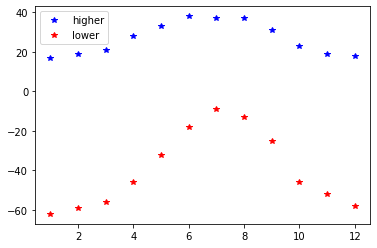

In [24]:
months = np.arange(1,13)
plt.plot(months,higher,'b*',label='higher')
plt.plot(months,lower,'r*',label='lower')

plt.legend()

RESULTS FOR MAX: 

mean: 6.735816065041522
std: 2.2944343445779625 

A: 23.09208136001528 

offest: 15.77932824354382 

[23.09208136  6.73581607  2.29443434 15.77932824]
RESULTS FOR MIN: 

mean: 7.164525973071063
std: 1.9759001481241487 

A: 52.649292106201216 

offest: -61.32093651046442 

[ 52.64929211   7.16452597   1.97590015 -61.32093651]


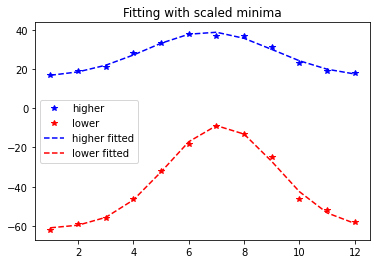

In [27]:
def f(x, A, mu, std, off):
    return A*np.exp(-(x-mu)**2. / (2 * std**2.))+ off
params, params_covariance = optimize.curve_fit(f, months, higher, [36, 6, 4, 0])
params_min, params_covariance_min = optimize.curve_fit(f, months, lower, [36, 6, 4, 0])
print("RESULTS FOR MAX:",'\n')
print('mean:', params[1])
print('std:', params[2],'\n')
print('A:', params[0],'\n')
print('offest:', params[3],'\n')
print(params)
print("RESULTS FOR MIN:",'\n')
print('mean:', params_min[1])
print('std:', params_min[2],'\n')
print('A:', params_min[0],'\n')
print('offest:', params_min[3],'\n')
print(params_min)
plt.plot(months,higher,'b*',label='higher')
plt.plot(months,lower,'r*',label='lower')
plt.plot(months, f(months, *params), 'b--',label='higher fitted')
plt.plot(months, f(months, *params_min), 'r--',label='lower fitted')
plt.title('Fitting with scaled minima')
plt.legend()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


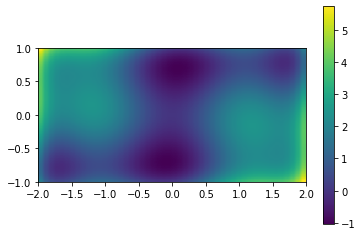

In [28]:
def six_hump(x):
    x1=x[0]
    x2=x[1]
    return (4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2 + (4*x2**2-4)*x2**2    
six_hump([0,0])
bound1=[-2,2]
bound2=[-1,1]
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
plt.figure()
plt.imshow(six_hump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

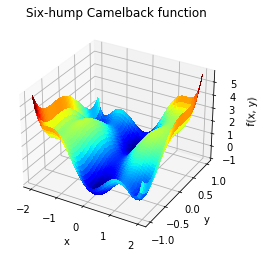

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, six_hump([xg, yg]), rstride=1, cstride=1,
                       cmap='jet', linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

0.0
-1.031628453489791
-1.0316284534898421
-1.0316284534898164


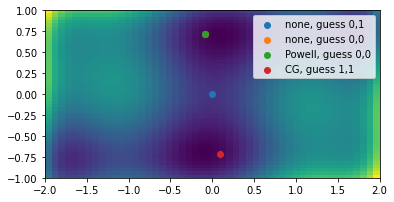

In [30]:
plt.imshow(six_hump([xg, yg]), extent=[-2, 2, -1, 1])
x_min = optimize.minimize(six_hump, x0=[0, 0])
x_min2 = optimize.minimize(six_hump,x0=[0,1])
x_min3 = optimize.minimize(six_hump, x0=[0, 0],method='Powell')
x_min4 = optimize.minimize(six_hump, x0=[1, 1],method='CG')
plt.scatter(x_min.x[0], x_min.x[1], label='none, guess 0,1')
plt.scatter(x_min2.x[0], x_min2.x[1], label='none, guess 0,0')
plt.scatter(x_min3.x[0], x_min3.x[1], label='Powell, guess 0,0')
plt.scatter(x_min4.x[0], x_min4.x[1], label='CG, guess 1,1')
plt.legend()
print(six_hump([x_min.x[0],x_min.x[1]]))
print(six_hump([x_min2.x[0],x_min2.x[1]]))
print(six_hump([x_min3.x[0],x_min3.x[1]]))
print(six_hump([x_min4.x[0],x_min4.x[1]]))

In [31]:
x = -2
y = -1
minimo = 0
minimi = np.zeros(0)
initial_guess= np.zeros(0)
x_y = np.zeros((0,0))
while x <2:
    while y <1:
        x_min = optimize.minimize(six_hump, x0=[x, y],method='Powell')
        minimo_found= six_hump([x_min.x[0],x_min.x[1]])
        #if minimo_found <= minimo:
            #minimo = minimo_found
        minimi = np.append(minimi, minimo_found)
        initial_guess = np.append(initial_guess,x)
        initial_guess = np.append(initial_guess,y)
        x_y = np.append(x_y,[x_min.x[0],x_min.x[0]])
            #x_y = np.append(x_y,x_min.x[1])
        y += 0.1
        #print(y)
    x +=0.1
    
print("global minima found:",minimi, '\n')
print("number of global minima found:",minimi.shape, '\n')
print("correspondent initial guess:",initial_guess, '\n')
print("x, y:", x_y, '\n')
print(5<=5)

global minima found: [-1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845
 -1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845
 -1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845 -1.03162845
 -1.03162845 -1.03162845 -1.03162845] 

number of global minima found: (21,) 

correspondent initial guess: [-2.00000000e+00 -1.00000000e+00 -2.00000000e+00 -9.00000000e-01
 -2.00000000e+00 -8.00000000e-01 -2.00000000e+00 -7.00000000e-01
 -2.00000000e+00 -6.00000000e-01 -2.00000000e+00 -5.00000000e-01
 -2.00000000e+00 -4.00000000e-01 -2.00000000e+00 -3.00000000e-01
 -2.00000000e+00 -2.00000000e-01 -2.00000000e+00 -1.00000000e-01
 -2.00000000e+00 -1.38777878e-16 -2.00000000e+00  1.00000000e-01
 -2.00000000e+00  2.00000000e-01 -2.00000000e+00  3.00000000e-01
 -2.00000000e+00  4.00000000e-01 -2.00000000e+00  5.00000000e-01
 -2.00000000e+00  6.00000000e-01 -2.00000000e+00  7.00000000e-01
 -2.00000000e+00  8.00000000e-01 -2.00000000e+00  9.00000000e-01
 -

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

<class 'numpy.ndarray'>


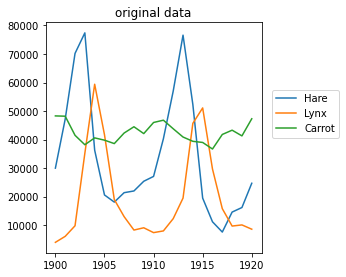

In [34]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 
plt.title("original data")
print(type(hares))

[ 0.          0.23809524  0.47619048  0.71428571  0.95238095  1.19047619
  1.42857143  1.66666667  1.9047619   2.14285714  2.38095238 -2.38095238
 -2.14285714 -1.9047619  -1.66666667 -1.42857143 -1.19047619 -0.95238095
 -0.71428571 -0.47619048 -0.23809524]


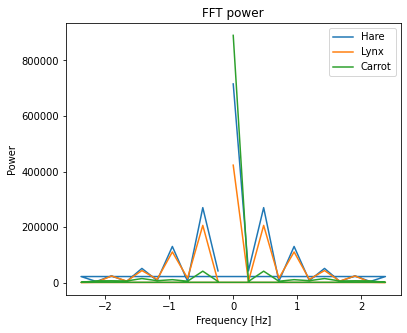

In [35]:
time_step=0.2
# The FFT of the signal
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)
# And the power (sig_fft is of complex dtype)
power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)
power_carrots = np.abs(carrots_fft)
# The corresponding frequencies
sample_freq = fftpack.fftfreq(hares.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power_hares,sample_freq, power_lynxes,sample_freq, power_carrots)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc='best')
plt.title("FFT power")
print(sample_freq)

peak frequency harex: 0.47619047619047616
peak frequency lynxes: 0.47619047619047616
peak frequency carrots: 0.47619047619047616
sample frequency: [ 0.          0.23809524  0.47619048  0.71428571  0.95238095  1.19047619
  1.42857143  1.66666667  1.9047619   2.14285714  2.38095238 -2.38095238
 -2.14285714 -1.9047619  -1.66666667 -1.42857143 -1.19047619 -0.95238095
 -0.71428571 -0.47619048 -0.23809524]


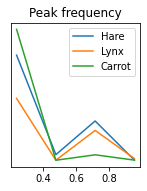

In [36]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq_hares = freqs[power_hares[pos_mask].argmax()]
peak_freq_lynxes = freqs[power_lynxes[pos_mask].argmax()]
peak_freq_carrots = freqs[power_carrots[pos_mask].argmax()]
axes = plt.axes([0.55, 0.3, 0.3, 0.5]) #numbers range from 0 to 1 and set position left-right, position up-down, width, height 
plt.title('Peak frequency')
print('peak frequency harex:',peak_freq_hares)
print('peak frequency lynxes:',peak_freq_lynxes)
print('peak frequency carrots:',peak_freq_carrots)
print('sample frequency:',sample_freq),
plt.plot(freqs[:4], power_hares[:4],freqs[:4], power_lynxes[:4],freqs[:4], power_carrots[:4])
plt.setp(axes, yticks=[])
plt.legend(('Hare', 'Lynx', 'Carrot'), loc='best')

c:\users\francesco\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\francesco\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\francesco\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


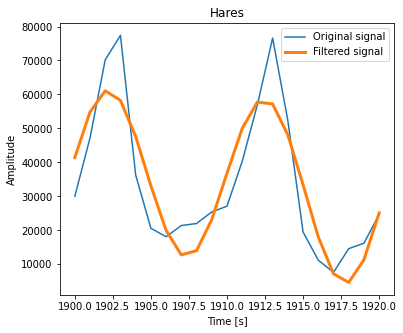

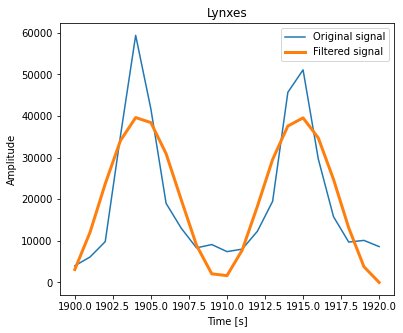

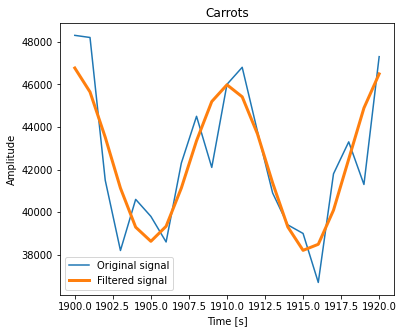

In [37]:
high_freq_fft_hares = hares_fft.copy()
high_freq_fft_hares[np.abs(sample_freq) > peak_freq_hares] = 0
filtered_sig_hares = fftpack.ifft(high_freq_fft_hares)

high_freq_fft_lynxes= lynxes_fft.copy()
high_freq_fft_lynxes[np.abs(sample_freq) > peak_freq_lynxes] = 0
filtered_sig_lynxes= fftpack.ifft(high_freq_fft_lynxes)

high_freq_fft_carrots= carrots_fft.copy()
high_freq_fft_carrots[np.abs(sample_freq) > peak_freq_carrots] = 0
filtered_sig_carrots= fftpack.ifft(high_freq_fft_carrots)

plt.figure(figsize=(6, 5))
plt.plot(year, hares, label='Original signal')
plt.plot(year, filtered_sig_hares, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Hares')
plt.legend(loc='best')

plt.figure(figsize=(6, 5))
plt.plot(year, lynxes, label='Original signal')
plt.plot(year, filtered_sig_lynxes, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Lynxes')
plt.legend(loc='best')

plt.figure(figsize=(6, 5))                      
plt.plot(year, carrots, label='Original signal')
plt.plot(year, filtered_sig_carrots, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Carrots')
plt.legend(loc='best')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Text(0.5, 1.0, 'original image')

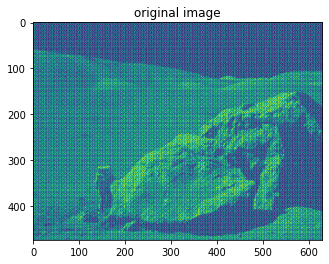

In [38]:
image='moonlanding.png'
image_read=plt.imread(image)
plt.imshow(image_read)
plt.title('original image')

In [39]:
image_fft = fftpack.fft2(image_read)
power = np.abs(image_fft)
print(power)
print(image_fft.shape, image_read.shape)
sample_freq = fftpack.fftfreq(image_read.size)
print(power.min(),power.max())

[[126598.46      4982.0117     322.73038 ...   1786.2231     322.73038
    4982.0117 ]
 [ 10781.32      6111.4897    2048.6772  ...   1155.5063    1064.6327
    2941.1335 ]
 [  7847.737     1742.8309     611.0654  ...   1006.1986    1604.4568
    2658.025  ]
 ...
 [  3071.3013     781.2016     378.1194  ...   1986.7524    4414.742
    2967.7014 ]
 [  7847.737     2658.025     1604.4568  ...   2209.9446     611.0654
    1742.8309 ]
 [ 10781.32      2941.1335    1064.6327  ...   1862.2832    2048.6772
    6111.4897 ]]
(474, 630) (474, 630)
0.090098776 126598.46


power normalized by imshow: [[1.         0.03935218 0.00254853 ... 0.01410866 0.00254853 0.03935218]
 [0.0851609  0.04827392 0.01618178 ... 0.00912663 0.00840882 0.02323129]
 [0.06198853 0.0137659  0.00482609 ... 0.00794725 0.01267289 0.02099502]
 ...
 [0.02425949 0.00617    0.00298605 ... 0.01569264 0.03487132 0.02344115]
 [0.06198853 0.02099502 0.01267289 ... 0.01745563 0.00482609 0.0137659 ]
 [0.0851609  0.02323129 0.00840882 ... 0.01470946 0.01618178 0.04827392]]


Text(0.5, 1.0, 'Original spectrum')

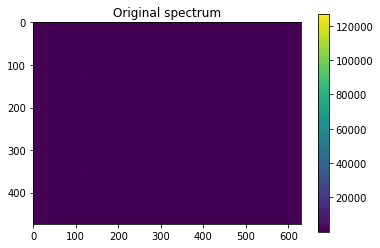

In [40]:
#without log scale la normalizzazione fa assumere valori molto bassi
plt.imshow(power,vmin=power.min(), vmax=power.max()) 
plt.colorbar()
diff3=power.max()-power.min()
power_norm3=(power-power.min())/diff3
print("power normalized by imshow:",power_norm3)
plt.title('Original spectrum')

Text(0.5, 1.0, 'Spectrum in log scale')

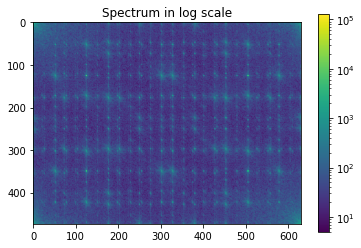

In [41]:
from matplotlib.colors import LogNorm
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Spectrum in log scale')

In [42]:
power_log=np.log(power)
min_log=np.log(power).min()
diff=np.log(power).max()-np.log(power).min()
power_norm=(power_log-min_log)/diff
#np.log(power).min()
#np.log(power).max()
min2=5
diff2=np.log(power).max()-5
power_norm2=(power_log-min2)/diff2
print("power normalized with lognorm in imshow:",'\n',power_norm,'\n')
print("power normalized with lognorm in imshow, vmin=5:",'\n',power_norm2)

power normalized with lognorm in imshow: 
 [[1.         0.77145576 0.5781212  ... 0.6989948  0.5781212  0.77145576]
 [0.82599103 0.7858908  0.7086793  ... 0.66822505 0.6624387  0.734224  ]
 [0.8035555  0.69725746 0.6232189  ... 0.6584509  0.6914134  0.7270741 ]
 ...
 [0.7372833  0.640571   0.5893105  ... 0.7065111  0.7629161  0.7348592 ]
 [0.8035555  0.7270741  0.6914134  ... 0.7140322  0.6232189  0.69725746]
 [0.82599103 0.734224   0.6624387  ... 0.7019406  0.7086793  0.7858908 ]] 

power normalized with lognorm in imshow, vmin=5: 
 [[1.         0.5206261  0.11510493 ... 0.36863855 0.11510493 0.5206261 ]
 [0.6350145  0.5509038  0.38895196 ... 0.3040987  0.29196188 0.44253218]
 [0.5879556  0.3649945  0.2096979  ... 0.28359732 0.35273665 0.42753515]
 ...
 [0.4489491  0.24609403 0.13857473 ... 0.3844041  0.50271416 0.44386467]
 [0.5879556  0.42753515 0.35273665 ... 0.40017965 0.2096979  0.3649945 ]
 [0.6350145  0.44253218 0.29196188 ... 0.37481743 0.38895196 0.5509038 ]]


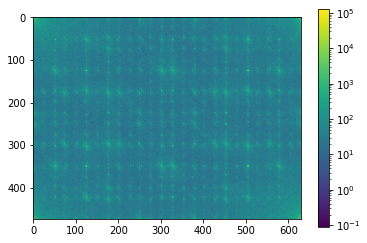

In [43]:
from matplotlib.colors import LogNorm
plt.imshow(power, norm=LogNorm(vmin=power.min()))
plt.colorbar()

In [45]:
keep_fraction = 0.1
im_fft2 = image_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
print(r*keep_fraction)
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

47.400000000000006


NameError: name 'plot_spectrum' is not defined

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Reconstructed Image')

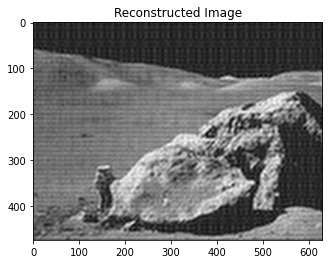

In [46]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')